In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
print("hi")

hi


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',


Saved heatmap_corr_union.png


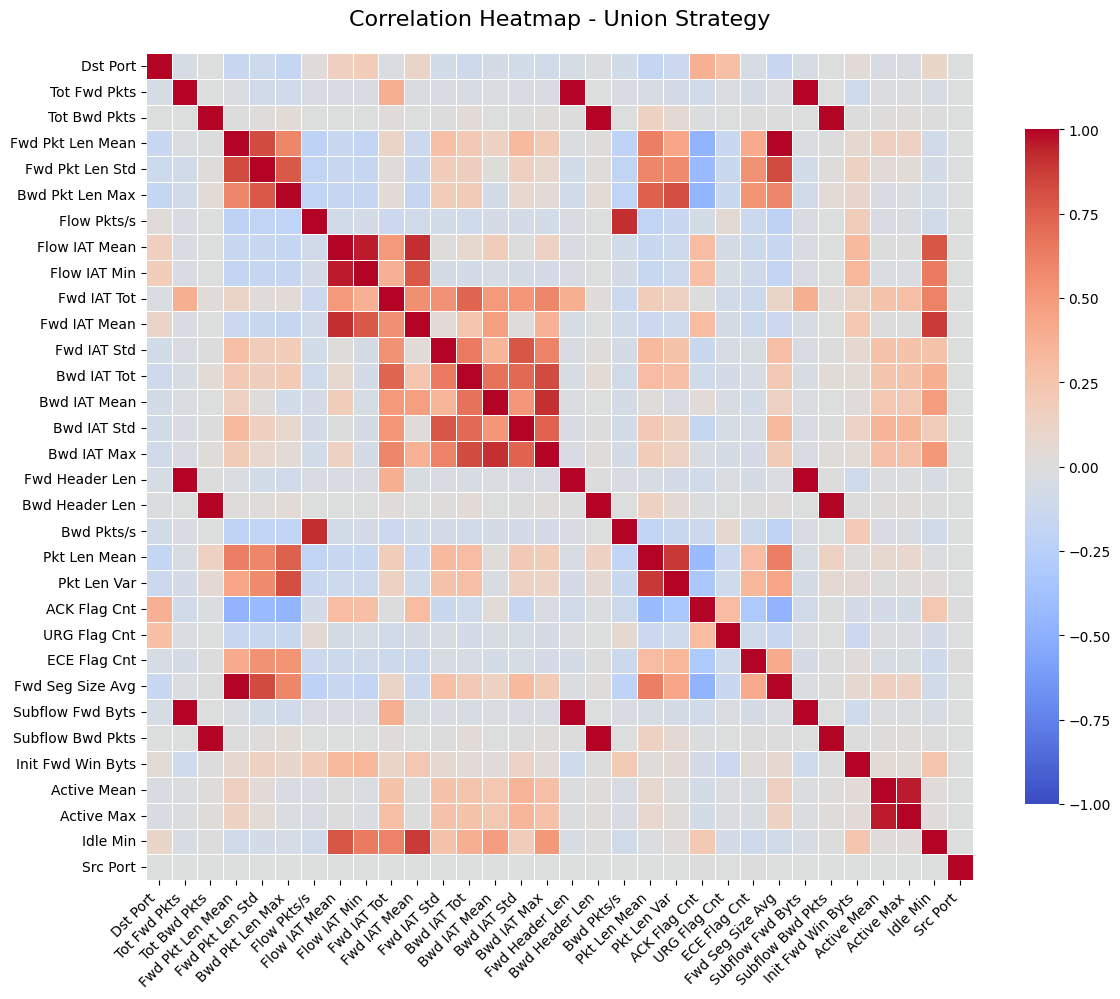

Saved heatmap_corr_intersection.png


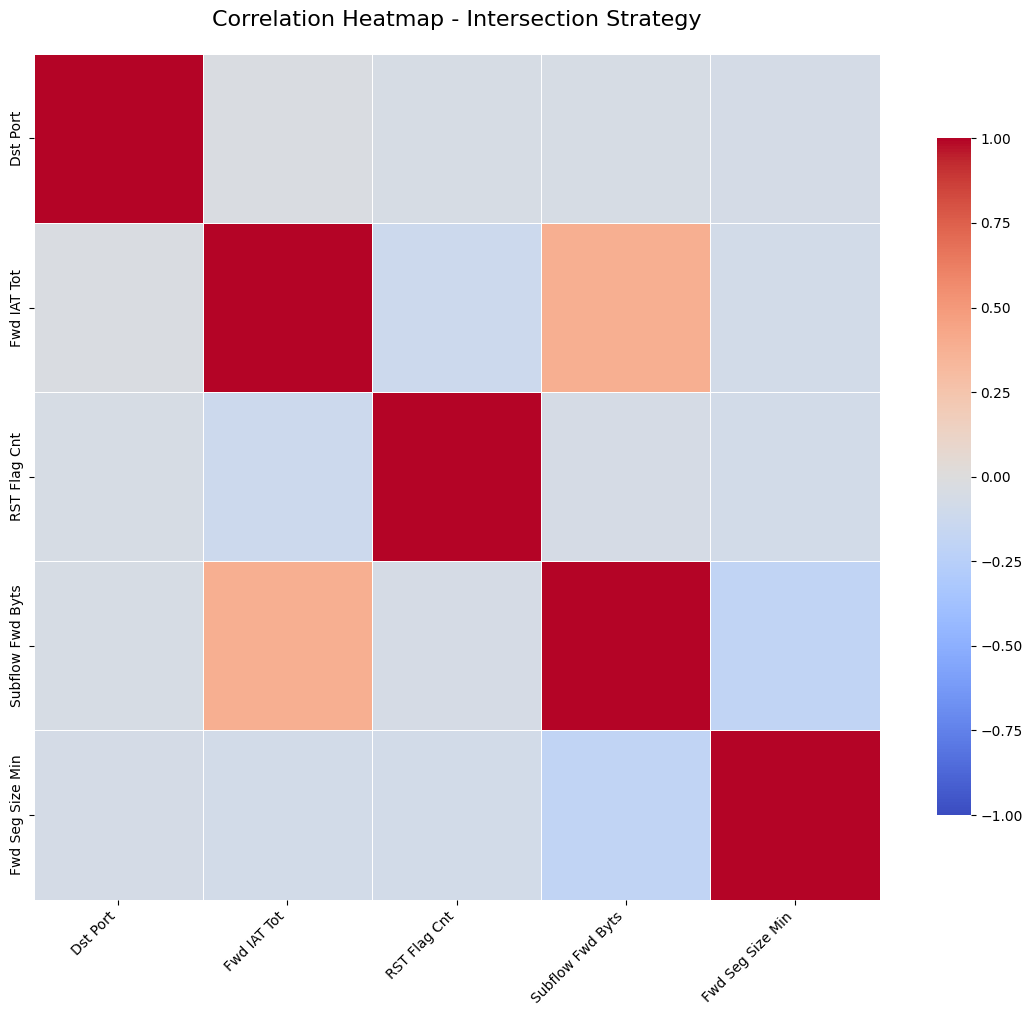

Saved heatmap_corr_voting.png


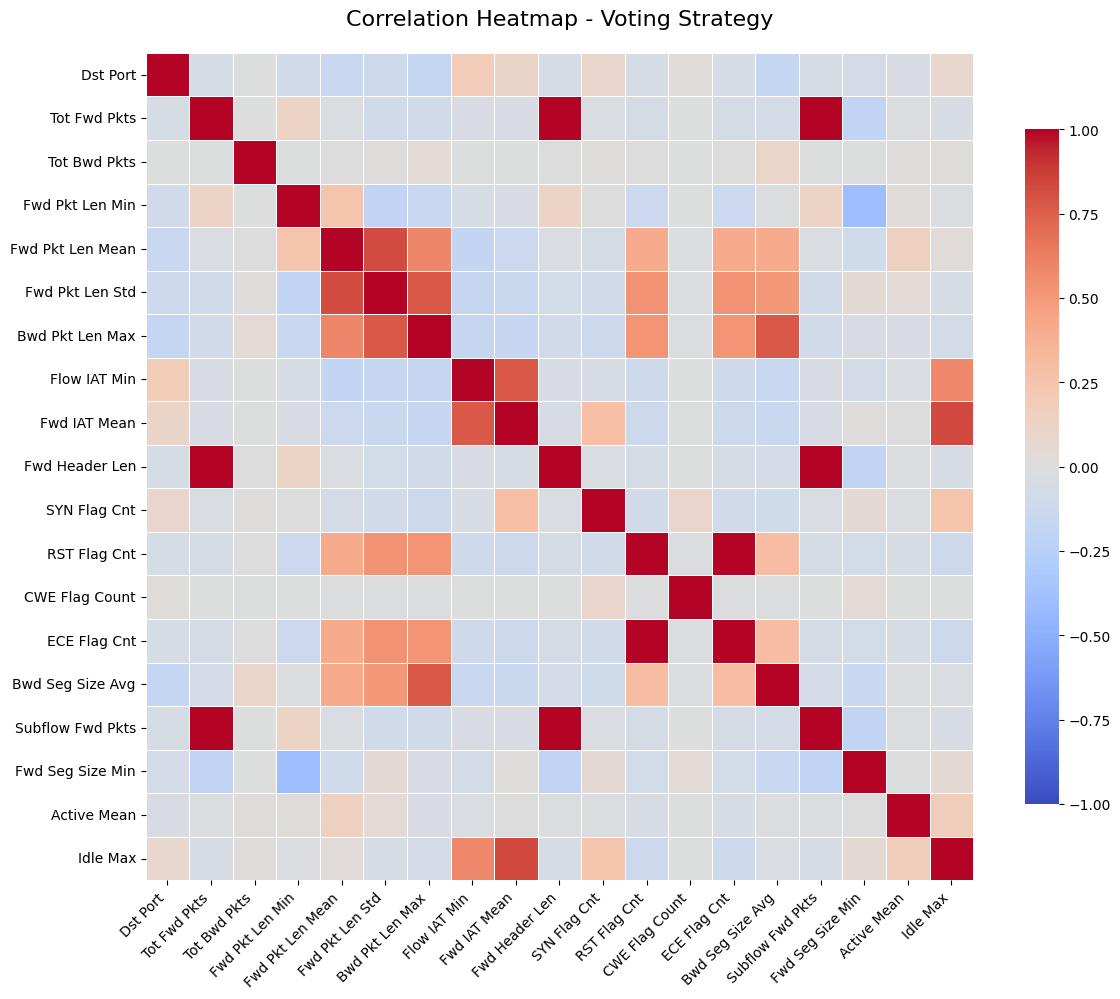

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Define the selected features for each strategy (from your 2018 IDS logs)
# Note: I removed 'Timestamp' and IPs if they are not numeric in your df
features_union = [
    'Dst Port', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Mean', 
    'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Min', 
    'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean', 
    'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 
    'Pkt Len Mean', 'Pkt Len Var', 'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt', 
    'Fwd Seg Size Avg', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Init Fwd Win Byts', 
    'Active Mean', 'Active Max', 'Idle Min', 'Src Port'
]

features_intersection = [
    'Dst Port', 'Fwd IAT Tot', 'RST Flag Cnt', 'Subflow Fwd Byts', 
    'Fwd Seg Size Min'
]

features_voting = [
    'Dst Port', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Min', 
    'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Flow IAT Min', 
    'Fwd IAT Mean', 'Fwd Header Len', 'SYN Flag Cnt', 'RST Flag Cnt', 'CWE Flag Count', 
    'ECE Flag Cnt', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Fwd Seg Size Min', 
    'Active Mean', 'Idle Max'
]

# Dictionary to iterate easily
strategies = {
    "Union": features_union,
    "Intersection": features_intersection,
    "Voting": features_voting
}

# 2. Function to plot and save heatmap
def plot_strategy_heatmap(strategy_name, feature_list, dataframe):
    # Filter columns that actually exist in your dataframe
    valid_features = [f for f in feature_list if f in dataframe.columns]
    
    if not valid_features:
        print(f"Skipping {strategy_name}: No matching columns found in dataframe.")
        return

    # Calculate Correlation Matrix
    corr_matrix = dataframe[valid_features].corr()

    # Plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, 
                annot=False,          # Set to True if you want numbers inside squares
                cmap='coolwarm',      # Blue-Red color scheme like the paper
                vmin=-1, vmax=1,      # Fix scale between -1 and 1
                square=True, 
                linewidths=0.5, 
                cbar_kws={"shrink": 0.8})
    
    plt.title(f'Correlation Heatmap - {strategy_name} Strategy', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Save
    filename = f'heatmap_corr_{strategy_name.lower()}.png'
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved {filename}")
    plt.show()

# 3. Execution Loop
# IMPORTANT: Replace 'df' with the actual name of your dataframe variable
# Ensure 'df' contains only numeric data for these columns
if 'df' in locals():
    for name, feats in strategies.items():
        plot_strategy_heatmap(name, feats, df)
else:
    print("Error: Please load your dataset into a variable named 'df' first.")

In [11]:
ff=pd.read_csv("/kaggle/input/combined-intrusion-detatection/combined_intrusion_dataset.csv")
ff.columns

/tmp/ipykernel_47/2666478124.py:1: DtypeWarning: Columns (80,81,83) have mixed types. Specify dtype option on import or set low_memory=False.
  ff=pd.read_csv("/kaggle/input/combined-intrusion-detatection/combined_intrusion_dataset.csv")


Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', '

In [12]:
ff.dtypes


Dst Port               int64
Protocol               int64
Timestamp             object
Flow Duration          int64
Tot Fwd Pkts           int64
Tot Bwd Pkts           int64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd IAT Mean         float64
Bwd IAT Std          float64
Bwd IAT Max          float64
Bwd IAT Min          float64
Fwd PSH Flags          int64
Bwd PSH Flags          int64
Fwd URG Flags 

In [15]:
len(ff.columns)

84

In [7]:
import pandas as pd

dtype_table = (
    df.dtypes
      .astype(str)
      .reset_index()
      .rename(columns={"index": "Feature", 0: "Data_Type"})
)

dtype_table


,Feature,Data_Type
0,Dst Port,float64
1,Protocol,float64
2,Timestamp,int64
3,Flow Duration,float64
4,Tot Fwd Pkts,float64
...,...,...
71,Label,int64
72,Flow ID,int64
73,Src IP,int64
74,Src Port,float64


In [9]:
import pandas as pd

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)
pd.set_option("display.max_colwidth", None)

print(ff.dtypes.to_string())


Dst Port               int64
Protocol               int64
Timestamp             object
Flow Duration          int64
Tot Fwd Pkts           int64
Tot Bwd Pkts           int64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd IAT Mean         float64
Bwd IAT Std          float64
Bwd IAT Max          float64
Bwd IAT Min          float64
Fwd PSH Flags          int64
Bwd PSH Flags          int64
Fwd URG Flags 

In [10]:
ff["Label"].value_counts()


Label
Benign                      50000
Bot                          4771
Infilteration                4771
DDOS attack-HOIC             4771
DDoS attacks-LOIC-HTTP       4771
DoS attacks-Hulk             4770
DoS attacks-SlowHTTPTest     4770
DoS attacks-GoldenEye        4770
DoS attacks-Slowloris        4770
FTP-BruteForce               4770
SSH-Bruteforce               4770
DDOS attack-LOIC-UDP         1730
Brute Force -Web              362
Brute Force -XSS              151
SQL Injection                  53
Name: count, dtype: int64

In [16]:
rr=pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")
rr.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd W

In [2]:
# intersection_hlo_with_hillclimb_fast.py
# Pipeline (reduced budget + hill-climb) with UNION, INTERSECTION, and VOTING candidate flows:
#  PSO + GA + GWO (CatBoost fitness, lighter during opt) -> derive UNION / INTERSECTION / VOTING
#  For each candidate set: HLO (on candidates) -> Greedy hill-climb (restricted) -> Final CatBoost eval (5-fold CV)
#  Additionally: train a CatBoost model on 80% of the data and evaluate on the held-out 20% test set
#  Train & save a CatBoost model for each flow (union / intersection / voting) using the 80/20 split.
# Prints logs, mean ± std for metrics, stage timings, saves results and models.

import time
import pickle
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.base import clone

warnings.filterwarnings("ignore")
np.random.seed(42)

# -------------------- USER / EXPERIMENT SETTINGS --------------------
# If you prefer to load CSV instead, uncomment and change:
df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")

TARGET_COL = "Label"   # target column
MODEL_VERBOSE = 0            # CatBoost verbosity: 0 = silent
RANDOM_STATE = 42

# ---------- Reduced budgets for faster runs (you can tune these) ----------
PSO_SWARM = 15   # reduced swarm
PSO_ITERS = 10   # reduced iterations

GA_POP = 30      # reduced population
GA_GENS = 10     # reduced generations

GWO_WOLVES = 10
GWO_ITERS = 10

HLO_POP = 15
HLO_ITERS = 10
HLO_TEACHER_FACTOR = 0.75
HLO_MUTATION = 0.12

# Greedy hill-climb after HLO
HILLCLIMB_MAX_STEPS = 100   # stop if no improvement or step limit
HILLCLIMB_EVAL_CAP = 500    # safety cap on evaluations (prevent runaway)

# CV folds
CV_OPT = 2    # cheaper CV during optimization + HLO (speed)
CV_FINAL = 5  # final evaluation (A1 requested)

# CatBoost iterations
CB_ITER_OPT = 100    # iterations during optimization (smaller)
CB_ITER_HLO = 200
CB_ITER_FINAL = 500  # final evaluation iterations (bigger)

# Train/test split for final saved models
FINAL_TEST_SIZE = 0.2

SAVE_PREFIX = "hybrid_hlo_models"
# ------------------------------------------------------------------------

# Ensure df exists
try:
    df
except NameError:
    raise RuntimeError("DataFrame `df` not found. Assign your dataset to variable `df` or load at top.")

# Prepare data
X = df.drop(TARGET_COL, axis=1)

y = df[TARGET_COL].astype(int)
FEATURE_NAMES = X.columns.tolist()
N_FEATURES = X.shape[1]

# -------------------- Model factory (CatBoost) --------------------
def get_catboost_model(iterations=100):
    try:
        from catboost import CatBoostClassifier
    except Exception as e:
        raise ImportError("catboost not installed. Install with: pip install catboost") from e
    return CatBoostClassifier(iterations=iterations, learning_rate=0.05, depth=6,
                              verbose=MODEL_VERBOSE, random_seed=RANDOM_STATE, thread_count=-1)

# -------------------- Fitness cache --------------------
# key: tuple(selected original indices) -> float score
fitness_cache = {}

def key_from_mask(mask_bool):
    return tuple(sorted(np.where(np.array(mask_bool).astype(bool))[0].tolist()))

def evaluate_mask_global(mask_bool, cv=CV_OPT, cb_iter=CB_ITER_OPT):
    """
    Evaluate mask using CatBoost with CV and return average of acc,prec,rec,f1.
    Caches results to avoid re-evaluating identical subsets.
    """
    key = key_from_mask(mask_bool)
    if key in fitness_cache:
        return fitness_cache[key]
    if len(key) == 0:
        fitness_cache[key] = 0.0
        return 0.0

    X_sel = X.iloc[:, list(key)]
    model = get_catboost_model(iterations=cb_iter)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)

    accs = cross_val_score(clone(model), X_sel, y, cv=skf, scoring="accuracy", n_jobs=-1)
    precs = cross_val_score(clone(model), X_sel, y, cv=skf, scoring=make_scorer(precision_score, zero_division=0), n_jobs=-1)
    recs = cross_val_score(clone(model), X_sel, y, cv=skf, scoring=make_scorer(recall_score, zero_division=0), n_jobs=-1)
    f1s = cross_val_score(clone(model), X_sel, y, cv=skf, scoring=make_scorer(f1_score, zero_division=0), n_jobs=-1)

    score = float((np.mean(accs) + np.mean(precs) + np.mean(recs) + np.mean(f1s)) / 4.0)
    fitness_cache[key] = score
    return score

# -------------------- Helpers --------------------
def mask_to_features(mask):
    idxs = np.where(np.array(mask).astype(bool))[0].tolist()
    return [FEATURE_NAMES[i] for i in idxs]

def log(msg):
    print(f"[{time.strftime('%H:%M:%S')}] {msg}", flush=True)

# -------------------- PSO (binary) --------------------
def run_pso(swarm_size=PSO_SWARM, iters=PSO_ITERS, cv=CV_OPT):
    log(f"PSO START (swarm={swarm_size}, iters={iters}, cv={cv})")
    t0 = time.time()
    dim = N_FEATURES
    pos = np.random.randint(0,2,(swarm_size,dim)).astype(int)
    vel = np.random.uniform(-1,1,(swarm_size,dim))

    pbest = pos.copy()
    pbest_scores = np.array([evaluate_mask_global(p.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for p in pos])

    gbest_idx = int(np.argmax(pbest_scores))
    gbest = pbest[gbest_idx].copy()
    gbest_score = pbest_scores[gbest_idx]

    w = 0.6; c1 = c2 = 1.5
    for t in range(iters):
        log(f" PSO iter {t+1}/{iters} best_global={gbest_score:.8}")
        for i in range(swarm_size):
            r1 = np.random.rand(dim); r2 = np.random.rand(dim)
            vel[i] = w*vel[i] + c1*r1*(pbest[i] - pos[i]) + c2*r2*(gbest - pos[i])
            s = 1.0 / (1.0 + np.exp(-vel[i]))
            pos[i] = (np.random.rand(dim) < s).astype(int)

            sc = evaluate_mask_global(pos[i].astype(bool), cv=cv, cb_iter=CB_ITER_OPT)
            if sc > pbest_scores[i]:
                pbest[i] = pos[i].copy()
                pbest_scores[i] = sc
            if sc > gbest_score:
                gbest = pos[i].copy()
                gbest_score = sc
        w = max(0.2, w*0.97)

    best_idx = int(np.argmax(pbest_scores))
    best_mask = pbest[best_idx].copy()
    best_score = pbest_scores[best_idx]
    t1 = time.time()
    log(f"PSO DONE in {int(t1-t0)}s best_score={best_score:.8f} selected={int(np.sum(best_mask))}")
    log(f"PSO SELECTED FEATURES: {mask_to_features(best_mask)}")

    return best_mask, best_score, int(t1-t0)

# -------------------- GA (binary) --------------------
def run_ga(pop_size=GA_POP, gens=GA_GENS, cv=CV_OPT):
    log(f"GA START (pop={pop_size}, gens={gens}, cv={cv})")
    t0 = time.time()
    dim = N_FEATURES
    pop = np.random.randint(0,2,(pop_size, dim)).astype(int)
    fitness_scores = np.array([evaluate_mask_global(ind.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for ind in pop])

    def tournament_select(k=3):
        idxs = np.random.randint(0, pop_size, k)
        return idxs[np.argmax(fitness_scores[idxs])]

    for g in range(gens):
        log(f" GA gen {g+1}/{gens} current_best={np.max(fitness_scores):.8f}")
        new_pop = []
        # elitism
        elite_idxs = np.argsort(fitness_scores)[-2:]
        new_pop.extend(pop[elite_idxs].tolist())

        while len(new_pop) < pop_size:
            i1 = tournament_select(); i2 = tournament_select()
            p1 = pop[i1].copy(); p2 = pop[i2].copy()
            # crossover
            if np.random.rand() < 0.7:
                pt = np.random.randint(1, dim)
                c1 = np.concatenate([p1[:pt], p2[pt:]])
                c2 = np.concatenate([p2[:pt], p1[pt:]])
            else:
                c1, c2 = p1, p2
            # mutation
            for child in (c1, c2):
                for d in range(dim):
                    if np.random.rand() < 0.1:
                        child[d] = 1 - child[d]
                new_pop.append(child)
                if len(new_pop) >= pop_size:
                    break
        pop = np.array(new_pop[:pop_size])
        fitness_scores = np.array([evaluate_mask_global(ind.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for ind in pop])

    best_idx = int(np.argmax(fitness_scores))
    best_mask = pop[best_idx].copy()
    best_score = fitness_scores[best_idx]
    t1 = time.time()
    log(f"GA DONE in {int(t1-t0)}s best_score={best_score:.8f} selected={int(np.sum(best_mask))}")
    log(f"GA SELECTED FEATURES: {mask_to_features(best_mask)}")

    return best_mask, best_score, int(t1-t0)

# -------------------- GWO (binary) --------------------
def run_gwo(wolves=GWO_WOLVES, iters=GWO_ITERS, cv=CV_OPT):
    log(f"GWO START (wolves={wolves}, iters={iters}, cv={cv})")
    t0 = time.time()
    dim = N_FEATURES
    pop = np.random.randint(0,2,(wolves, dim)).astype(int)
    fitness_scores = np.array([evaluate_mask_global(ind.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for ind in pop])

    Alpha = Beta = Delta = None
    Alpha_score = Beta_score = Delta_score = -1.0

    for itr in range(iters):
        log(f" GWO iter {itr+1}/{iters} best_alpha={Alpha_score:.8f}")
        for i in range(wolves):
            sc = fitness_scores[i]
            if sc > Alpha_score:
                Delta_score, Beta_score, Alpha_score = Beta_score, Alpha_score, sc
                Delta, Beta, Alpha = Beta, Alpha, pop[i].copy()
            elif sc > Beta_score:
                Delta_score, Beta_score = Beta_score, sc
                Delta, Beta = Beta, pop[i].copy()
            elif sc > Delta_score:
                Delta_score = sc
                Delta = pop[i].copy()

        a = 2 - itr * (2.0 / iters)
        for i in range(wolves):
            for d in range(dim):
                if Alpha is None:
                    continue
                r1, r2 = np.random.rand(), np.random.rand()
                A1 = 2 * a * r1 - a; C1 = 2 * r2
                D_alpha = abs(C1 * Alpha[d] - pop[i][d])
                X1 = Alpha[d] - A1 * D_alpha

                r1, r2 = np.random.rand(), np.random.rand()
                A2 = 2 * a * r1 - a; C2 = 2 * r2
                D_beta = abs(C2 * Beta[d] - pop[i][d])
                X2 = Beta[d] - A2 * D_beta

                r1, r2 = np.random.rand(), np.random.rand()
                A3 = 2 * a * r1 - a; C3 = 2 * r2
                D_delta = abs(C3 * Delta[d] - pop[i][d])
                X3 = Delta[d] - A3 * D_delta

                new_pos = (X1 + X2 + X3) / 3.0
                s = 1.0 / (1.0 + np.exp(-new_pos))
                pop[i][d] = 1 if np.random.rand() < s else 0

        fitness_scores = np.array([evaluate_mask_global(ind.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for ind in pop])

    best_idx = int(np.argmax(fitness_scores))
    best_mask = pop[best_idx].copy()
    best_score = fitness_scores[best_idx]
    t1 = time.time()
    log(f"GWO DONE in {int(t1-t0)}s best_score={best_score:.8f} selected={int(np.sum(best_mask))}")
    log(f"GWO SELECTED FEATURES: {mask_to_features(best_mask)}")

    return best_mask, best_score, int(t1-t0)

# -------------------- INTERSECTION / UNION / VOTING --------------------
def get_intersection_mask(*masks):
    """Return mask that contains only features present in ALL provided masks."""
    if len(masks) == 0:
        return np.zeros(N_FEATURES, dtype=int)
    inter_idx = set(np.where(np.array(masks[0]).astype(bool))[0].tolist())
    for m in masks[1:]:
        idxs = set(np.where(np.array(m).astype(bool))[0].tolist())
        inter_idx = inter_idx.intersection(idxs)
    mask = np.zeros(N_FEATURES, dtype=int)
    for i in inter_idx:
        mask[i] = 1
    return mask


def get_union_mask(*masks):
    union_idx = set()
    for m in masks:
        idxs = np.where(np.array(m).astype(bool))[0].tolist()
        union_idx.update(idxs)
    mask = np.zeros(N_FEATURES, dtype=int)
    for i in union_idx:
        mask[i] = 1
    return mask


def get_voting_mask(*masks, threshold=2):
    """Return mask of features selected by at least `threshold` methods (default majority of 3 => 2)."""
    if len(masks) == 0:
        return np.zeros(N_FEATURES, dtype=int)
    counts = np.zeros(N_FEATURES, dtype=int)
    for m in masks:
        counts += np.array(m).astype(int)
    mask = (counts >= threshold).astype(int)
    return mask

# -------------------- HLO on candidates --------------------
def hlo_on_candidates(candidate_mask, pop_size=HLO_POP, iters=HLO_ITERS, cv=CV_OPT):
    candidate_indices = np.where(np.array(candidate_mask).astype(bool))[0].tolist()
    k = len(candidate_indices)
    if k == 0:
        raise ValueError("Candidate set is empty.")

    log(f"HLO START on {k} candidate features (pop={pop_size}, iters={iters})")
    t0 = time.time()

    pop = np.random.randint(0,2,(pop_size, k)).astype(int)

    def fitness_candidate(bitmask):
        full_mask = np.zeros(N_FEATURES, dtype=int)
        for j,bit in enumerate(bitmask):
            if bit == 1:
                full_mask[candidate_indices[j]] = 1
        return evaluate_mask_global(full_mask.astype(bool), cv=cv, cb_iter=CB_ITER_HLO)

    fitness_scores = np.array([fitness_candidate(ind) for ind in pop])
    best_idx = int(np.argmax(fitness_scores))
    best_solution = pop[best_idx].copy()
    best_score = fitness_scores[best_idx]

    for it in range(iters):
        log(f" HLO iter {it+1}/{iters} current_best={best_score:.8f}")
        teacher = pop[int(np.argmax(fitness_scores))].copy()
        new_pop = []
        for i in range(pop_size):
            learner = pop[i].copy()
            # teaching phase
            for d in range(k):
                if np.random.rand() < HLO_TEACHER_FACTOR:
                    learner[d] = teacher[d]
            # peer learning
            partner = pop[np.random.randint(pop_size)].copy()
            for d in range(k):
                if learner[d] != partner[d] and np.random.rand() < 0.5:
                    learner[d] = partner[d]
            # mutation
            for d in range(k):
                if np.random.rand() < HLO_MUTATION:
                    learner[d] = 1 - learner[d]
            new_pop.append(learner)
        pop = np.array(new_pop)
        fitness_scores = np.array([fitness_candidate(ind) for ind in pop])
        gen_best_idx = int(np.argmax(fitness_scores))
        gen_best_score = fitness_scores[gen_best_idx]
        gen_best_sol = pop[gen_best_idx].copy()
        if gen_best_score > best_score:
            best_score = gen_best_score
            best_solution = gen_best_sol.copy()

    # map back to full mask
    final_full_mask = np.zeros(N_FEATURES, dtype=int)
    for j,bit in enumerate(best_solution):
        if bit == 1:
            final_full_mask[candidate_indices[j]] = 1

    t1 = time.time()
    log(f"HLO DONE in {int(t1-t0)}s best_score={best_score:.8f} final_selected={int(np.sum(final_full_mask))}")
    return final_full_mask, best_score, int(t1-t0)

# -------------------- Greedy Hill-Climb (local search) --------------------
def hill_climb_on_candidates(initial_mask, candidate_mask, max_steps=HILLCLIMB_MAX_STEPS, eval_cap=HILLCLIMB_EVAL_CAP, cv=CV_OPT):
    """
    Greedy single-bit flip hill-climb restricted to candidate indices.
    Starts from initial_mask (full-length). Tries flipping each candidate feature's bit:
    - If flip improves fitness, accept and restart scanning.
    - Stops when no improving flip found or max_steps/eval_cap reached.
    """
    candidate_indices = np.where(np.array(candidate_mask).astype(bool))[0].tolist()
    if len(candidate_indices) == 0:
        log("Hill-climb: candidate set empty, skipping.")
        return initial_mask, 0.0, 0

    log(f"Hill-climb START over {len(candidate_indices)} candidates (max_steps={max_steps}, eval_cap={eval_cap})")
    t0 = time.time()
    current_mask = initial_mask.copy()
    current_score = evaluate_mask_global(current_mask.astype(bool), cv=cv, cb_iter=CB_ITER_HLO)
    evals = 0
    steps = 0
    improved = True

    while improved and steps < max_steps and evals < eval_cap:
        improved = False
        for idx in np.random.permutation(candidate_indices):
            trial_mask = current_mask.copy()
            trial_mask[idx] = 1 - trial_mask[idx]  # flip
            trial_score = evaluate_mask_global(trial_mask.astype(bool), cv=cv, cb_iter=CB_ITER_HLO)
            evals += 1
            if trial_score > current_score + 1e-8:
                current_mask = trial_mask
                current_score = trial_score
                improved = True
                steps += 1
                log(f" Hill-climb step {steps}: flipped {FEATURE_NAMES[idx]} -> new_score={current_score:.4f} (evals={evals})")
                break
            if evals >= eval_cap or steps >= max_steps:
                break
    t1 = time.time()
    log(f"Hill-climb DONE in {int(t1-t0)}s steps={steps} evals={evals} final_score={current_score:.8f} selected={int(np.sum(current_mask))}")
    return current_mask, current_score, int(t1-t0)

# -------------------- Final evaluation (5-fold CV) --------------------
def final_evaluation(mask_bool, cv=CV_FINAL, cb_iter=CB_ITER_FINAL):
    idxs = np.where(np.array(mask_bool).astype(bool))[0].tolist()
    if len(idxs) == 0:
        raise ValueError("Final mask selects zero features.")
    X_sel = X.iloc[:, idxs]
    model = get_catboost_model(iterations=cb_iter)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)
    accs = []; precs = []; recs = []; f1s = []
    t0 = time.time()
    for tr,te in skf.split(X_sel, y):
        m = clone(model); m.fit(X_sel.iloc[tr], y.iloc[tr])
        pred = m.predict(X_sel.iloc[te])
        accs.append(accuracy_score(y.iloc[te], pred))
        precs.append(precision_score(y.iloc[te], pred, zero_division=0))
        recs.append(recall_score(y.iloc[te], pred, zero_division=0))
        f1s.append(f1_score(y.iloc[te], pred, zero_division=0))
    t1 = time.time()
    results = {
        "n_features": len(idxs),
        "features": [FEATURE_NAMES[i] for i in idxs],
        "acc_mean": float(np.mean(accs)), "acc_std": float(np.std(accs)),
        "prec_mean": float(np.mean(precs)), "prec_std": float(np.std(precs)),
        "rec_mean": float(np.mean(recs)), "rec_std": float(np.std(recs)),
        "f1_mean": float(np.mean(f1s)), "f1_std": float(np.std(f1s)),
        "eval_time_s": int(t1 - t0)
    }
    return results

# -------------------- MAIN PIPELINE --------------------
if __name__ == "__main__":
    total_t0 = time.time()
    log("===== HYBRID (reduced budget) + HLO + HILL-CLIMB (UNION/INTERSECTION/VOTING) START =====")

    # PSO
    pso_mask, pso_score, pso_time = run_pso(swarm_size=PSO_SWARM, iters=PSO_ITERS, cv=CV_OPT)

    # GA
    ga_mask, ga_score, ga_time = run_ga(pop_size=GA_POP, gens=GA_GENS, cv=CV_OPT)

    # GWO
    gwo_mask, gwo_score, gwo_time = run_gwo(wolves=GWO_WOLVES, iters=GWO_ITERS, cv=CV_OPT)

    # Derive candidate masks
    union_mask = get_union_mask(pso_mask, ga_mask, gwo_mask)
    inter_mask = get_intersection_mask(pso_mask, ga_mask, gwo_mask)
    vote_mask = get_voting_mask(pso_mask, ga_mask, gwo_mask, threshold=2)

    candidate_sets = {
        'union': union_mask,
        'intersection': inter_mask,
        'voting': vote_mask
    }

    results_all = {}

    # run HLO -> hill-climb -> final evaluation -> train & save model for each candidate set
    for name, cand_mask in candidate_sets.items():
        log(f"===== PROCESSING {name.upper()} CANDIDATES =====")
        n_cand = int(np.sum(cand_mask))
        log(f"{name.upper()} candidate features: {n_cand}")
        if n_cand == 0:
            log(f"{name.upper()} empty — skipping HLO/hill-climb and model training.")
            results_all[name] = {'skipped': True, 'n_candidates': 0}
            continue

        # HLO on this candidate set
        hlo_mask, hlo_score, hlo_time = hlo_on_candidates(cand_mask, pop_size=HLO_POP, iters=HLO_ITERS, cv=CV_OPT)

        # hill-climb restricted to candidate set
        hc_mask, hc_score, hc_time = hill_climb_on_candidates(hlo_mask, cand_mask, max_steps=HILLCLIMB_MAX_STEPS, eval_cap=HILLCLIMB_EVAL_CAP, cv=CV_OPT)

        # final CV evaluation
        final_res = final_evaluation(hc_mask, cv=CV_FINAL, cb_iter=CB_ITER_FINAL)

        # Train final CatBoost model on 80% train and evaluate on 20% test (stratified)
        sel_idxs = np.where(np.array(hc_mask).astype(bool))[0].tolist()
        sel_features = [FEATURE_NAMES[i] for i in sel_idxs]

        if len(sel_features) == 0:
            log(f"No features selected after hill-climb for {name}, skipping model train.")
            results_all[name] = {'skipped': True, 'n_candidates': n_cand}
            continue

        X_sel = X[sel_features]
        X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=FINAL_TEST_SIZE, stratify=y, random_state=RANDOM_STATE)

        model = get_catboost_model(iterations=CB_ITER_FINAL)
        model.fit(X_train, y_train)

        # evaluate on held-out test set (20%)
        y_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        test_prec = precision_score(y_test, y_pred, zero_division=0)
        test_rec = recall_score(y_test, y_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_pred, zero_division=0)

        test_metrics = {
            'acc': float(test_acc), 'prec': float(test_prec), 'rec': float(test_rec), 'f1': float(test_f1),
            'n_test': int(X_test.shape[0])
        }

        # Save model to file (pickle)
        model_filename = f"{SAVE_PREFIX}_{name}_model.pkl"
        with open(model_filename, 'wb') as mf:
            pickle.dump(model, mf)

        # store results
        results_all[name] = {
            'n_candidates': n_cand,
            'hlo_score': float(hlo_score), 'hlo_time': int(hlo_time),
            'hc_score': float(hc_score), 'hc_time': int(hc_time),
            'final_eval': final_res,
            'selected_features': sel_features,
            'model_file': model_filename,
            'test_metrics': test_metrics
        }

        log(f"Saved trained CatBoost model for {name} -> {model_filename} (test_f1={test_f1:.8f})")

    total_t1 = time.time()
    elapsed_total = int(total_t1 - total_t0)

    # Summary / save aggregated results
    print("==================== AGGREGATE SUMMARY ====================")
    print(f"PSO  -> opt_score={pso_score:.8f} selected={int(np.sum(pso_mask))} time={pso_time}s")
    print(f"GA   -> opt_score={ga_score:.8f} selected={int(np.sum(ga_mask))} time={ga_time}s")
    print(f"GWO  -> opt_score={gwo_score:.8f} selected={int(np.sum(gwo_mask))} time={gwo_time}s")
    print(f"Union candidates    : {int(np.sum(union_mask))}")
    print(f"Intersection candidates: {int(np.sum(inter_mask))}")
    print(f"Voting candidates   : {int(np.sum(vote_mask))}")
    print("-------------------------------------------------")

    for name, info in results_all.items():
        print(f"-- {name.upper()} SUMMARY --")
        if info.get('skipped'):
            print(" skipped (no candidates)")
            continue
        fe = info['final_eval']
        tm = info['test_metrics']
        print(f" Selected ({fe['n_features']}): {fe['features']}")
        print(f" CV F1   : {fe['f1_mean']:.8f} ± {fe['f1_std']:.8f}")
        print(f" Test F1 : {tm['f1']:.8f} (n_test={tm['n_test']})")
        print(f" Accuracy : {fe['acc_mean']:.8f} ± {fe['acc_std']:.8f}")
        print(f" Precision: {fe['prec_mean']:.8f} ± {fe['prec_std']:.8f}")
        print(f" Recall   : {fe['rec_mean']:.8f} ± {fe['rec_std']:.8f}")
        print(f" Model file: {info['model_file']}")



    # Save aggregated pipeline outputs
    out = {
        "pso_mask": pso_mask, "pso_score": pso_score, "pso_time": pso_time,
        "ga_mask": ga_mask, "ga_score": ga_score, "ga_time": ga_time,
        "gwo_mask": gwo_mask, "gwo_score": gwo_score, "gwo_time": gwo_time,
        "union_mask": union_mask, "intersection_mask": inter_mask, "voting_mask": vote_mask,
        "results_all": results_all,
        "fitness_cache_len": len(fitness_cache)
    }
    with open(f"{SAVE_PREFIX}_results.pkl", "wb") as f:
        pickle.dump(out, f)

    log(f"Saved results to {SAVE_PREFIX}_results.pkl")
    log("===== PIPELINE COMPLETE =====")

[13:07:39] ===== HYBRID (reduced budget) + HLO + HILL-CLIMB (UNION/INTERSECTION/VOTING) START =====
[13:07:39] PSO START (swarm=15, iters=10, cv=2)
[13:11:23]  PSO iter 1/10 best_global=0.99924073
[13:15:01]  PSO iter 2/10 best_global=0.99927188
[13:18:41]  PSO iter 3/10 best_global=0.99930312
[13:22:18]  PSO iter 4/10 best_global=0.99930312
[13:25:58]  PSO iter 5/10 best_global=0.99930312
[13:29:39]  PSO iter 6/10 best_global=0.99930312
[13:33:17]  PSO iter 7/10 best_global=0.99930312
[13:36:56]  PSO iter 8/10 best_global=0.99930312
[13:40:34]  PSO iter 9/10 best_global=0.99930312
[13:44:10]  PSO iter 10/10 best_global=0.99930312
[13:47:51] PSO DONE in 2412s best_score=0.99930312 selected=34
[13:47:51] PSO SELECTED FEATURES: ['Dst Port', 'Timestamp', 'Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Tot', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Len', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt

In [ ]:
# intersection_hlo_with_hillclimb_fast.py
# Pipeline (reduced budget + hill-climb) with UNION, INTERSECTION, and VOTING candidate flows:
#  PSO + GA + GWO (CatBoost fitness, lighter during opt) -> derive UNION / INTERSECTION / VOTING
#  For each candidate set: HLO (on candidates) -> Greedy hill-climb (restricted) -> Final CatBoost eval (5-fold CV)
#  Additionally: train a CatBoost model on 80% of the data and evaluate on the held-out 20% test set
#  Train & save a CatBoost model for each flow (union / intersection / voting) using the 80/20 split.
# Prints logs, mean ± std for metrics, stage timings, saves results and models.

import time
import pickle
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.base import clone

warnings.filterwarnings("ignore")
np.random.seed(42)

# -------------------- USER / EXPERIMENT SETTINGS --------------------
# If you prefer to load CSV instead, uncomment and change:
df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")

TARGET_COL = "Label"   # target column
MODEL_VERBOSE = 0            # CatBoost verbosity: 0 = silent
RANDOM_STATE = 42

# ---------- Reduced budgets for faster runs (you can tune these) ----------
PSO_SWARM = 15   # reduced swarm
PSO_ITERS = 10   # reduced iterations

GA_POP = 30      # reduced population
GA_GENS = 10     # reduced generations

GWO_WOLVES = 10
GWO_ITERS = 10

HLO_POP = 15
HLO_ITERS = 10
HLO_TEACHER_FACTOR = 0.75
HLO_MUTATION = 0.12

# Greedy hill-climb after HLO
HILLCLIMB_MAX_STEPS = 100   # stop if no improvement or step limit
HILLCLIMB_EVAL_CAP = 500    # safety cap on evaluations (prevent runaway)

# CV folds
CV_OPT = 2    # cheaper CV during optimization + HLO (speed)
CV_FINAL = 5  # final evaluation (A1 requested)

# CatBoost iterations
CB_ITER_OPT = 100    # iterations during optimization (smaller)
CB_ITER_HLO = 200
CB_ITER_FINAL = 500  # final evaluation iterations (bigger)

# Train/test split for final saved models
FINAL_TEST_SIZE = 0.2

SAVE_PREFIX = "hybrid_hlo_models"
# ------------------------------------------------------------------------

# Ensure df exists
try:
    df
except NameError:
    raise RuntimeError("DataFrame `df` not found. Assign your dataset to variable `df` or load at top.")

# Prepare data
X = df.drop(TARGET_COL, axis=1)

y = df[TARGET_COL].astype(int)
FEATURE_NAMES = X.columns.tolist()
N_FEATURES = X.shape[1]

# -------------------- Model factory (CatBoost) --------------------
def get_catboost_model(iterations=100):
    try:
        from catboost import CatBoostClassifier
    except Exception as e:
        raise ImportError("catboost not installed. Install with: pip install catboost") from e
    return CatBoostClassifier(iterations=iterations, learning_rate=0.05, depth=6,
                              verbose=MODEL_VERBOSE, random_seed=RANDOM_STATE, thread_count=-1)

# -------------------- Fitness cache --------------------
# key: tuple(selected original indices) -> float score
fitness_cache = {}

def key_from_mask(mask_bool):
    return tuple(sorted(np.where(np.array(mask_bool).astype(bool))[0].tolist()))

def evaluate_mask_global(mask_bool, cv=CV_OPT, cb_iter=CB_ITER_OPT):
    """
    Evaluate mask using CatBoost with CV and return average of acc,prec,rec,f1.
    Caches results to avoid re-evaluating identical subsets.
    """
    key = key_from_mask(mask_bool)
    if key in fitness_cache:
        return fitness_cache[key]
    if len(key) == 0:
        fitness_cache[key] = 0.0
        return 0.0

    X_sel = X.iloc[:, list(key)]
    model = get_catboost_model(iterations=cb_iter)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)

    accs = cross_val_score(clone(model), X_sel, y, cv=skf, scoring="accuracy", n_jobs=-1)
    precs = cross_val_score(clone(model), X_sel, y, cv=skf, scoring=make_scorer(precision_score, zero_division=0), n_jobs=-1)
    recs = cross_val_score(clone(model), X_sel, y, cv=skf, scoring=make_scorer(recall_score, zero_division=0), n_jobs=-1)
    f1s = cross_val_score(clone(model), X_sel, y, cv=skf, scoring=make_scorer(f1_score, zero_division=0), n_jobs=-1)

    score = float((np.mean(accs) + np.mean(precs) + np.mean(recs) + np.mean(f1s)) / 4.0)
    fitness_cache[key] = score
    return score

# -------------------- Helpers --------------------
def mask_to_features(mask):
    idxs = np.where(np.array(mask).astype(bool))[0].tolist()
    return [FEATURE_NAMES[i] for i in idxs]

def log(msg):
    print(f"[{time.strftime('%H:%M:%S')}] {msg}", flush=True)

# -------------------- PSO (binary) --------------------
def run_pso(swarm_size=PSO_SWARM, iters=PSO_ITERS, cv=CV_OPT):
    log(f"PSO START (swarm={swarm_size}, iters={iters}, cv={cv})")
    t0 = time.time()
    dim = N_FEATURES
    pos = np.random.randint(0,2,(swarm_size,dim)).astype(int)
    vel = np.random.uniform(-1,1,(swarm_size,dim))

    pbest = pos.copy()
    pbest_scores = np.array([evaluate_mask_global(p.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for p in pos])

    gbest_idx = int(np.argmax(pbest_scores))
    gbest = pbest[gbest_idx].copy()
    gbest_score = pbest_scores[gbest_idx]

    w = 0.6; c1 = c2 = 1.5
    for t in range(iters):
        log(f" PSO iter {t+1}/{iters} best_global={gbest_score:.8}")
        for i in range(swarm_size):
            r1 = np.random.rand(dim); r2 = np.random.rand(dim)
            vel[i] = w*vel[i] + c1*r1*(pbest[i] - pos[i]) + c2*r2*(gbest - pos[i])
            s = 1.0 / (1.0 + np.exp(-vel[i]))
            pos[i] = (np.random.rand(dim) < s).astype(int)

            sc = evaluate_mask_global(pos[i].astype(bool), cv=cv, cb_iter=CB_ITER_OPT)
            if sc > pbest_scores[i]:
                pbest[i] = pos[i].copy()
                pbest_scores[i] = sc
            if sc > gbest_score:
                gbest = pos[i].copy()
                gbest_score = sc
        w = max(0.2, w*0.97)

    best_idx = int(np.argmax(pbest_scores))
    best_mask = pbest[best_idx].copy()
    best_score = pbest_scores[best_idx]
    t1 = time.time()
    log(f"PSO DONE in {int(t1-t0)}s best_score={best_score:.8f} selected={int(np.sum(best_mask))}")
    log(f"PSO SELECTED FEATURES: {mask_to_features(best_mask)}")

    return best_mask, best_score, int(t1-t0)

# -------------------- GA (binary) --------------------
def run_ga(pop_size=GA_POP, gens=GA_GENS, cv=CV_OPT):
    log(f"GA START (pop={pop_size}, gens={gens}, cv={cv})")
    t0 = time.time()
    dim = N_FEATURES
    pop = np.random.randint(0,2,(pop_size, dim)).astype(int)
    fitness_scores = np.array([evaluate_mask_global(ind.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for ind in pop])

    def tournament_select(k=3):
        idxs = np.random.randint(0, pop_size, k)
        return idxs[np.argmax(fitness_scores[idxs])]

    for g in range(gens):
        log(f" GA gen {g+1}/{gens} current_best={np.max(fitness_scores):.8f}")
        new_pop = []
        # elitism
        elite_idxs = np.argsort(fitness_scores)[-2:]
        new_pop.extend(pop[elite_idxs].tolist())

        while len(new_pop) < pop_size:
            i1 = tournament_select(); i2 = tournament_select()
            p1 = pop[i1].copy(); p2 = pop[i2].copy()
            # crossover
            if np.random.rand() < 0.7:
                pt = np.random.randint(1, dim)
                c1 = np.concatenate([p1[:pt], p2[pt:]])
                c2 = np.concatenate([p2[:pt], p1[pt:]])
            else:
                c1, c2 = p1, p2
            # mutation
            for child in (c1, c2):
                for d in range(dim):
                    if np.random.rand() < 0.1:
                        child[d] = 1 - child[d]
                new_pop.append(child)
                if len(new_pop) >= pop_size:
                    break
        pop = np.array(new_pop[:pop_size])
        fitness_scores = np.array([evaluate_mask_global(ind.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for ind in pop])

    best_idx = int(np.argmax(fitness_scores))
    best_mask = pop[best_idx].copy()
    best_score = fitness_scores[best_idx]
    t1 = time.time()
    log(f"GA DONE in {int(t1-t0)}s best_score={best_score:.8f} selected={int(np.sum(best_mask))}")
    log(f"GA SELECTED FEATURES: {mask_to_features(best_mask)}")

    return best_mask, best_score, int(t1-t0)

# -------------------- GWO (binary) --------------------
def run_gwo(wolves=GWO_WOLVES, iters=GWO_ITERS, cv=CV_OPT):
    log(f"GWO START (wolves={wolves}, iters={iters}, cv={cv})")
    t0 = time.time()
    dim = N_FEATURES
    pop = np.random.randint(0,2,(wolves, dim)).astype(int)
    fitness_scores = np.array([evaluate_mask_global(ind.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for ind in pop])

    Alpha = Beta = Delta = None
    Alpha_score = Beta_score = Delta_score = -1.0

    for itr in range(iters):
        log(f" GWO iter {itr+1}/{iters} best_alpha={Alpha_score:.8f}")
        for i in range(wolves):
            sc = fitness_scores[i]
            if sc > Alpha_score:
                Delta_score, Beta_score, Alpha_score = Beta_score, Alpha_score, sc
                Delta, Beta, Alpha = Beta, Alpha, pop[i].copy()
            elif sc > Beta_score:
                Delta_score, Beta_score = Beta_score, sc
                Delta, Beta = Beta, pop[i].copy()
            elif sc > Delta_score:
                Delta_score = sc
                Delta = pop[i].copy()

        a = 2 - itr * (2.0 / iters)
        for i in range(wolves):
            for d in range(dim):
                if Alpha is None:
                    continue
                r1, r2 = np.random.rand(), np.random.rand()
                A1 = 2 * a * r1 - a; C1 = 2 * r2
                D_alpha = abs(C1 * Alpha[d] - pop[i][d])
                X1 = Alpha[d] - A1 * D_alpha

                r1, r2 = np.random.rand(), np.random.rand()
                A2 = 2 * a * r1 - a; C2 = 2 * r2
                D_beta = abs(C2 * Beta[d] - pop[i][d])
                X2 = Beta[d] - A2 * D_beta

                r1, r2 = np.random.rand(), np.random.rand()
                A3 = 2 * a * r1 - a; C3 = 2 * r2
                D_delta = abs(C3 * Delta[d] - pop[i][d])
                X3 = Delta[d] - A3 * D_delta

                new_pos = (X1 + X2 + X3) / 3.0
                s = 1.0 / (1.0 + np.exp(-new_pos))
                pop[i][d] = 1 if np.random.rand() < s else 0

        fitness_scores = np.array([evaluate_mask_global(ind.astype(bool), cv=cv, cb_iter=CB_ITER_OPT) for ind in pop])

    best_idx = int(np.argmax(fitness_scores))
    best_mask = pop[best_idx].copy()
    best_score = fitness_scores[best_idx]
    t1 = time.time()
    log(f"GWO DONE in {int(t1-t0)}s best_score={best_score:.8f} selected={int(np.sum(best_mask))}")
    log(f"GWO SELECTED FEATURES: {mask_to_features(best_mask)}")

    return best_mask, best_score, int(t1-t0)

# -------------------- INTERSECTION / UNION / VOTING --------------------
def get_intersection_mask(*masks):
    """Return mask that contains only features present in ALL provided masks."""
    if len(masks) == 0:
        return np.zeros(N_FEATURES, dtype=int)
    inter_idx = set(np.where(np.array(masks[0]).astype(bool))[0].tolist())
    for m in masks[1:]:
        idxs = set(np.where(np.array(m).astype(bool))[0].tolist())
        inter_idx = inter_idx.intersection(idxs)
    mask = np.zeros(N_FEATURES, dtype=int)
    for i in inter_idx:
        mask[i] = 1
    return mask


def get_union_mask(*masks):
    union_idx = set()
    for m in masks:
        idxs = np.where(np.array(m).astype(bool))[0].tolist()
        union_idx.update(idxs)
    mask = np.zeros(N_FEATURES, dtype=int)
    for i in union_idx:
        mask[i] = 1
    return mask


def get_voting_mask(*masks, threshold=2):
    """Return mask of features selected by at least `threshold` methods (default majority of 3 => 2)."""
    if len(masks) == 0:
        return np.zeros(N_FEATURES, dtype=int)
    counts = np.zeros(N_FEATURES, dtype=int)
    for m in masks:
        counts += np.array(m).astype(int)
    mask = (counts >= threshold).astype(int)
    return mask

# -------------------- HLO on candidates --------------------
def hlo_on_candidates(candidate_mask, pop_size=HLO_POP, iters=HLO_ITERS, cv=CV_OPT):
    candidate_indices = np.where(np.array(candidate_mask).astype(bool))[0].tolist()
    k = len(candidate_indices)
    if k == 0:
        raise ValueError("Candidate set is empty.")

    log(f"HLO START on {k} candidate features (pop={pop_size}, iters={iters})")
    t0 = time.time()

    pop = np.random.randint(0,2,(pop_size, k)).astype(int)

    def fitness_candidate(bitmask):
        full_mask = np.zeros(N_FEATURES, dtype=int)
        for j,bit in enumerate(bitmask):
            if bit == 1:
                full_mask[candidate_indices[j]] = 1
        return evaluate_mask_global(full_mask.astype(bool), cv=cv, cb_iter=CB_ITER_HLO)

    fitness_scores = np.array([fitness_candidate(ind) for ind in pop])
    best_idx = int(np.argmax(fitness_scores))
    best_solution = pop[best_idx].copy()
    best_score = fitness_scores[best_idx]

    for it in range(iters):
        log(f" HLO iter {it+1}/{iters} current_best={best_score:.8f}")
        teacher = pop[int(np.argmax(fitness_scores))].copy()
        new_pop = []
        for i in range(pop_size):
            learner = pop[i].copy()
            # teaching phase
            for d in range(k):
                if np.random.rand() < HLO_TEACHER_FACTOR:
                    learner[d] = teacher[d]
            # peer learning
            partner = pop[np.random.randint(pop_size)].copy()
            for d in range(k):
                if learner[d] != partner[d] and np.random.rand() < 0.5:
                    learner[d] = partner[d]
            # mutation
            for d in range(k):
                if np.random.rand() < HLO_MUTATION:
                    learner[d] = 1 - learner[d]
            new_pop.append(learner)
        pop = np.array(new_pop)
        fitness_scores = np.array([fitness_candidate(ind) for ind in pop])
        gen_best_idx = int(np.argmax(fitness_scores))
        gen_best_score = fitness_scores[gen_best_idx]
        gen_best_sol = pop[gen_best_idx].copy()
        if gen_best_score > best_score:
            best_score = gen_best_score
            best_solution = gen_best_sol.copy()

    # map back to full mask
    final_full_mask = np.zeros(N_FEATURES, dtype=int)
    for j,bit in enumerate(best_solution):
        if bit == 1:
            final_full_mask[candidate_indices[j]] = 1

    t1 = time.time()
    log(f"HLO DONE in {int(t1-t0)}s best_score={best_score:.8f} final_selected={int(np.sum(final_full_mask))}")
    return final_full_mask, best_score, int(t1-t0)

# -------------------- Greedy Hill-Climb (local search) --------------------
def hill_climb_on_candidates(initial_mask, candidate_mask, max_steps=HILLCLIMB_MAX_STEPS, eval_cap=HILLCLIMB_EVAL_CAP, cv=CV_OPT):
    """
    Greedy single-bit flip hill-climb restricted to candidate indices.
    Starts from initial_mask (full-length). Tries flipping each candidate feature's bit:
    - If flip improves fitness, accept and restart scanning.
    - Stops when no improving flip found or max_steps/eval_cap reached.
    """
    candidate_indices = np.where(np.array(candidate_mask).astype(bool))[0].tolist()
    if len(candidate_indices) == 0:
        log("Hill-climb: candidate set empty, skipping.")
        return initial_mask, 0.0, 0

    log(f"Hill-climb START over {len(candidate_indices)} candidates (max_steps={max_steps}, eval_cap={eval_cap})")
    t0 = time.time()
    current_mask = initial_mask.copy()
    current_score = evaluate_mask_global(current_mask.astype(bool), cv=cv, cb_iter=CB_ITER_HLO)
    evals = 0
    steps = 0
    improved = True

    while improved and steps < max_steps and evals < eval_cap:
        improved = False
        for idx in np.random.permutation(candidate_indices):
            trial_mask = current_mask.copy()
            trial_mask[idx] = 1 - trial_mask[idx]  # flip
            trial_score = evaluate_mask_global(trial_mask.astype(bool), cv=cv, cb_iter=CB_ITER_HLO)
            evals += 1
            if trial_score > current_score + 1e-8:
                current_mask = trial_mask
                current_score = trial_score
                improved = True
                steps += 1
                log(f" Hill-climb step {steps}: flipped {FEATURE_NAMES[idx]} -> new_score={current_score:.4f} (evals={evals})")
                break
            if evals >= eval_cap or steps >= max_steps:
                break
    t1 = time.time()
    log(f"Hill-climb DONE in {int(t1-t0)}s steps={steps} evals={evals} final_score={current_score:.8f} selected={int(np.sum(current_mask))}")
    return current_mask, current_score, int(t1-t0)

# -------------------- Final evaluation (5-fold CV) --------------------
def final_evaluation(mask_bool, cv=CV_FINAL, cb_iter=CB_ITER_FINAL):
    idxs = np.where(np.array(mask_bool).astype(bool))[0].tolist()
    if len(idxs) == 0:
        raise ValueError("Final mask selects zero features.")
    X_sel = X.iloc[:, idxs]
    model = get_catboost_model(iterations=cb_iter)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)
    accs = []; precs = []; recs = []; f1s = []
    t0 = time.time()
    for tr,te in skf.split(X_sel, y):
        m = clone(model); m.fit(X_sel.iloc[tr], y.iloc[tr])
        pred = m.predict(X_sel.iloc[te])
        accs.append(accuracy_score(y.iloc[te], pred))
        precs.append(precision_score(y.iloc[te], pred, zero_division=0))
        recs.append(recall_score(y.iloc[te], pred, zero_division=0))
        f1s.append(f1_score(y.iloc[te], pred, zero_division=0))
    t1 = time.time()
    results = {
        "n_features": len(idxs),
        "features": [FEATURE_NAMES[i] for i in idxs],
        "acc_mean": float(np.mean(accs)), "acc_std": float(np.std(accs)),
        "prec_mean": float(np.mean(precs)), "prec_std": float(np.std(precs)),
        "rec_mean": float(np.mean(recs)), "rec_std": float(np.std(recs)),
        "f1_mean": float(np.mean(f1s)), "f1_std": float(np.std(f1s)),
        "eval_time_s": int(t1 - t0)
    }
    return results

# -------------------- MAIN PIPELINE --------------------
if __name__ == "__main__":
    total_t0 = time.time()
    log("===== HYBRID (reduced budget) + HLO + HILL-CLIMB (UNION/INTERSECTION/VOTING) START =====")

    # PSO
    pso_mask, pso_score, pso_time = run_pso(swarm_size=PSO_SWARM, iters=PSO_ITERS, cv=CV_OPT)

    # GA
    ga_mask, ga_score, ga_time = run_ga(pop_size=GA_POP, gens=GA_GENS, cv=CV_OPT)

    # GWO
    gwo_mask, gwo_score, gwo_time = run_gwo(wolves=GWO_WOLVES, iters=GWO_ITERS, cv=CV_OPT)

    # Derive candidate masks
    union_mask = get_union_mask(pso_mask, ga_mask, gwo_mask)
    inter_mask = get_intersection_mask(pso_mask, ga_mask, gwo_mask)
    vote_mask = get_voting_mask(pso_mask, ga_mask, gwo_mask, threshold=2)

    candidate_sets = {
        'union': union_mask,
        'intersection': inter_mask,
        'voting': vote_mask
    }

    results_all = {}

    # run HLO -> hill-climb -> final evaluation -> train & save model for each candidate set
    for name, cand_mask in candidate_sets.items():
        log(f"===== PROCESSING {name.upper()} CANDIDATES =====")
        n_cand = int(np.sum(cand_mask))
        log(f"{name.upper()} candidate features: {n_cand}")
        if n_cand == 0:
            log(f"{name.upper()} empty — skipping HLO/hill-climb and model training.")
            results_all[name] = {'skipped': True, 'n_candidates': 0}
            continue

        # HLO on this candidate set
        hlo_mask, hlo_score, hlo_time = hlo_on_candidates(cand_mask, pop_size=HLO_POP, iters=HLO_ITERS, cv=CV_OPT)

        # hill-climb restricted to candidate set
        hc_mask, hc_score, hc_time = hill_climb_on_candidates(hlo_mask, cand_mask, max_steps=HILLCLIMB_MAX_STEPS, eval_cap=HILLCLIMB_EVAL_CAP, cv=CV_OPT)

        # final CV evaluation
        final_res = final_evaluation(hc_mask, cv=CV_FINAL, cb_iter=CB_ITER_FINAL)

        # Train final CatBoost model on 80% train and evaluate on 20% test (stratified)
        sel_idxs = np.where(np.array(hc_mask).astype(bool))[0].tolist()
        sel_features = [FEATURE_NAMES[i] for i in sel_idxs]

        if len(sel_features) == 0:
            log(f"No features selected after hill-climb for {name}, skipping model train.")
            results_all[name] = {'skipped': True, 'n_candidates': n_cand}
            continue

        X_sel = X[sel_features]
        X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=FINAL_TEST_SIZE, stratify=y, random_state=RANDOM_STATE)

        model = get_catboost_model(iterations=CB_ITER_FINAL)
        model.fit(X_train, y_train)

        # evaluate on held-out test set (20%)
        y_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        test_prec = precision_score(y_test, y_pred, zero_division=0)
        test_rec = recall_score(y_test, y_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_pred, zero_division=0)

        test_metrics = {
            'acc': float(test_acc), 'prec': float(test_prec), 'rec': float(test_rec), 'f1': float(test_f1),
            'n_test': int(X_test.shape[0])
        }

        # Save model to file (pickle)
        model_filename = f"{SAVE_PREFIX}_{name}_model.pkl"
        with open(model_filename, 'wb') as mf:
            pickle.dump(model, mf)

        # store results
        results_all[name] = {
            'n_candidates': n_cand,
            'hlo_score': float(hlo_score), 'hlo_time': int(hlo_time),
            'hc_score': float(hc_score), 'hc_time': int(hc_time),
            'final_eval': final_res,
            'selected_features': sel_features,
            'model_file': model_filename,
            'test_metrics': test_metrics
        }

        log(f"Saved trained CatBoost model for {name} -> {model_filename} (test_f1={test_f1:.8f})")

    total_t1 = time.time()
    elapsed_total = int(total_t1 - total_t0)

    # Summary / save aggregated results
    print("==================== AGGREGATE SUMMARY ====================")
    print(f"PSO  -> opt_score={pso_score:.8f} selected={int(np.sum(pso_mask))} time={pso_time}s")
    print(f"GA   -> opt_score={ga_score:.8f} selected={int(np.sum(ga_mask))} time={ga_time}s")
    print(f"GWO  -> opt_score={gwo_score:.8f} selected={int(np.sum(gwo_mask))} time={gwo_time}s")
    print(f"Union candidates    : {int(np.sum(union_mask))}")
    print(f"Intersection candidates: {int(np.sum(inter_mask))}")
    print(f"Voting candidates   : {int(np.sum(vote_mask))}")
    print("-------------------------------------------------")

    for name, info in results_all.items():
        print(f"-- {name.upper()} SUMMARY --")
        if info.get('skipped'):
            print(" skipped (no candidates)")
            continue
        fe = info['final_eval']
        tm = info['test_metrics']
        print(f" Selected ({fe['n_features']}): {fe['features']}")
        print(f" CV F1   : {fe['f1_mean']:.8f} ± {fe['f1_std']:.8f}")
        print(f" Test F1 : {tm['f1']:.8f} (n_test={tm['n_test']})")
        print(f" Accuracy : {fe['acc_mean']:.8f} ± {fe['acc_std']:.8f}")
        print(f" Precision: {fe['prec_mean']:.8f} ± {fe['prec_std']:.8f}")
        print(f" Recall   : {fe['rec_mean']:.8f} ± {fe['rec_std']:.8f}")
        print(f" Model file: {info['model_file']}")



    # Save aggregated pipeline outputs
    out = {
        "pso_mask": pso_mask, "pso_score": pso_score, "pso_time": pso_time,
        "ga_mask": ga_mask, "ga_score": ga_score, "ga_time": ga_time,
        "gwo_mask": gwo_mask, "gwo_score": gwo_score, "gwo_time": gwo_time,
        "union_mask": union_mask, "intersection_mask": inter_mask, "voting_mask": vote_mask,
        "results_all": results_all,
        "fitness_cache_len": len(fitness_cache)
    }
    with open(f"{SAVE_PREFIX}_results.pkl", "wb") as f:
        pickle.dump(out, f)

    log(f"Saved results to {SAVE_PREFIX}_results.pkl")
    log("===== PIPELINE COMPLETE =====")

2018ids pca xgboost

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from xgboost import XGBClassifier   # 🔥 NEW

df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")

X = df.drop("Label",axis=1)
y = df["Label"].astype(int)

# 1) Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) PCA to retain 95% variance
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

print("Original dimension:", X.shape[1])
print("PCA dimension:", X_pca.shape[1])

# 3) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20, stratify=y, random_state=42
)

# ---------------------------------------------------
# 4) ❗ Replace CatBoost with XGBoost
# ---------------------------------------------------
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist"        # Fast training
)

# Fit
model.fit(X_train, y_train)

# Test prediction
y_pred = model.predict(X_test)

# Metrics
test_acc = accuracy_score(y_test, y_pred)
test_prec = precision_score(y_test, y_pred, zero_division=0)
test_rec = recall_score(y_test, y_pred, zero_division=0)
test_f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n=== PCA + XGBOOST MODEL RESULTS ===")
print("Test Accuracy :", test_acc)
print("Precision     :", test_prec)
print("Recall        :", test_rec)
print("F1 Score      :", test_f1)


Original dimension: 75
PCA dimension: 24

=== PCA + XGBOOST MODEL RESULTS ===
Test Accuracy : 0.9957568631460559
Precision     : 0.996438671834084
Recall        : 0.9948755490483162
F1 Score      : 0.9956564969386152


chi sqaure

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier   # ← changed

# -------------------------
# 1. Prepare data
# -------------------------
df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")

X = df.drop("Label",axis=1)
y = df["Label"].astype(int)

print("Original dimension:", X.shape[1])

# Train-test split (same style as your hybrid pipeline)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# -------------------------
# 2. Scale to non-negative for chi-square
# -------------------------
scaler = MinMaxScaler()   # maps features to [0, 1]
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 3. Try different numbers of selected features
# -------------------------
k_values = [5, 10, 15, 20, 16,33,7,21,30]

results_chi2 = {}

for k in k_values:
    print("\n" + "="*60)
    print(f"CHI-SQUARE + XGBoost with top-{k} features")
    print("="*60)

    # 3.1 Chi-Square feature selection
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_k = selector.fit_transform(X_train_scaled, y_train)
    X_test_k = selector.transform(X_test_scaled)

    # Get selected feature names (from original X)
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask].tolist()
    print(f"Selected {k} features:")
    print(selected_features)

    # 3.2 Train XGBoost on selected features
    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        use_label_encoder=False,   # avoid label encoder warning
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_k, y_train)

    # 3.3 Evaluate on test set
    y_pred = model.predict(X_test_k)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Test Accuracy : {acc:.6f}")
    print(f"Precision     : {prec:.6f}")
    print(f"Recall        : {rec:.6f}")
    print(f"F1 Score      : {f1:.6f}")

    # store results for later comparison
    results_chi2[k] = {
        "features": selected_features,
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1
    }

print("\n=========== SUMMARY: Chi-Square + XGBoost ===========")
for k, info in results_chi2.items():
    print(f"Top-{k} features -> F1={info['f1']:.6f}, Acc={info['acc']:.6f}")


Original dimension: 75

CHI-SQUARE + XGBoost with top-5 features
Selected 5 features:
['Dst Port', 'Timestamp', 'Bwd Pkts/s', 'Init Bwd Win Byts', 'Fwd Seg Size Min']
Test Accuracy : 0.998978
Precision     : 0.999477
Recall        : 0.998431
F1 Score      : 0.998954

CHI-SQUARE + XGBoost with top-10 features
Selected 10 features:
['Dst Port', 'Timestamp', 'Bwd Pkt Len Min', 'Flow Pkts/s', 'Bwd IAT Min', 'Bwd Pkts/s', 'ACK Flag Cnt', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min']
Test Accuracy : 0.999131
Precision     : 0.999686
Recall        : 0.998536
F1 Score      : 0.999111

CHI-SQUARE + XGBoost with top-15 features
Selected 15 features:
['Dst Port', 'Timestamp', 'Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Pkts/s', 'Bwd IAT Mean', 'Bwd IAT Min', 'Bwd Pkts/s', 'ACK Flag Cnt', 'Bwd Seg Size Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min']
Test Accuracy : 0.999284
Precision     : 0.999791
Recall        : 0.998745


mutual information

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier   # <-- changed

# -------------------------
# 1. Prepare data
# -------------------------

print("Original dimension:", X.shape[1])

# Train-test split (keep same style as other experiments)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# -------------------------
# 2. Try different numbers of selected features
# -------------------------
k_values = [5, 10, 15, 20, 16,33,7,21,30]

results_mi = {}

for k in k_values:
    print("\n" + "="*60)
    print(f"MUTUAL INFORMATION + XGBoost with top-{k} features")
    print("="*60)

    # 2.1 Mutual Information feature selection
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_k = selector.fit_transform(X_train, y_train)
    X_test_k = selector.transform(X_test)

    # Get selected feature names (from original X)
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask].tolist()
    print(f"Selected {k} features:")
    print(selected_features)

    # 2.2 Train XGBoost on selected features
    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        use_label_encoder=False,   # avoid label-encoder warning in older xgboost
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_k, y_train)

    # 2.3 Evaluate on test set
    y_pred = model.predict(X_test_k)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Test Accuracy : {acc:.6f}")
    print(f"Precision     : {prec:.6f}")
    print(f"Recall        : {rec:.6f}")
    print(f"F1 Score      : {f1:.6f}")

    # store results for later comparison
    results_mi[k] = {
        "features": selected_features,
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1
    }

print("\n=========== SUMMARY: Mutual Information + XGBoost ===========")
for k, info in results_mi.items():
    print(f"Top-{k} features -> F1={info['f1']:.6f}, Acc={info['acc']:.6f}")


Original dimension: 75

MUTUAL INFORMATION + XGBoost with top-5 features
Selected 5 features:
['Dst Port', 'Timestamp', 'Fwd Header Len', 'Pkt Len Max', 'Init Fwd Win Byts']
Test Accuracy : 0.999335
Precision     : 0.999581
Recall        : 0.999059
F1 Score      : 0.999320

MUTUAL INFORMATION + XGBoost with top-10 features
Selected 10 features:
['Dst Port', 'Timestamp', 'TotLen Fwd Pkts', 'Fwd Header Len', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Subflow Fwd Byts', 'Init Fwd Win Byts']
Test Accuracy : 0.999131
Precision     : 0.999686
Recall        : 0.998536
F1 Score      : 0.999111

MUTUAL INFORMATION + XGBoost with top-15 features
Selected 15 features:
['Dst Port', 'Timestamp', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Fwd Header Len', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Pkt Size Avg', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Init Fwd Win Byts']
Test Accuracy : 0.999335
Precision     : 0.999895
Recall    

recursive feature elimination

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier   # <-- changed

# -------------------------
# 1. Prepare data
# -------------------------

df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")

X = df.drop("Label",axis=1)
y = df["Label"].astype(int)

print("Original dimension:", X.shape[1])

# Train-test split (same style as other baselines)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# -------------------------
# 2. Try different numbers of selected features with RFE
# -------------------------
k_values = [5, 10, 15, 20, 30,33,7,21]

results_rfe = {}

for k in k_values:
    print("\n" + "="*60)
    print(f"RFE (XGBoost) with top-{k} features")
    print("="*60)

    # Base estimator for RFE (reduced iterations to save time)
    base_model = XGBClassifier(
        n_estimators=200,            # reduced for speed during RFE
        learning_rate=0.05,
        max_depth=6,
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

    # 2.1 RFE setup
    selector = RFE(
        estimator=base_model,
        n_features_to_select=k,
        step=1
    )

    # Fit RFE on training data
    selector.fit(X_train, y_train)

    # Transform train and test sets
    X_train_k = selector.transform(X_train)
    X_test_k = selector.transform(X_test)

    # Get selected feature names
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask].tolist()
    print(f"Selected {k} features:")
    print(selected_features)

    # 2.2 Train a fresh XGBoost on the selected features (for fair comparison)
    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_k, y_train)

    # 2.3 Evaluate on test set
    y_pred = model.predict(X_test_k)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Test Accuracy : {acc:.6f}")
    print(f"Precision     : {prec:.6f}")
    print(f"Recall        : {rec:.6f}")
    print(f"F1 Score      : {f1:.6f}")

    # store results for later comparison
    results_rfe[k] = {
        "features": selected_features,
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1
    }

print("\n=========== SUMMARY: RFE (XGBoost) ===========")
for k, info in results_rfe.items():
    print(f"Top-{k} features -> F1={info['f1']:.6f}, Acc={info['acc']:.6f}")


Original dimension: 75

RFE (XGBoost) with top-5 features
Selected 5 features:
['Dst Port', 'Timestamp', 'Bwd Pkt Len Mean', 'Bwd Pkts/s', 'Idle Std']
Test Accuracy : 0.999233
Precision     : 0.999791
Recall        : 0.998640
F1 Score      : 0.999215

RFE (XGBoost) with top-10 features
Selected 10 features:
['Dst Port', 'Timestamp', 'Flow Duration', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Bwd IAT Std', 'Bwd Pkts/s', 'Fwd Seg Size Min', 'Active Mean', 'Idle Std']
Test Accuracy : 0.999182
Precision     : 0.999581
Recall        : 0.998745
F1 Score      : 0.999163

RFE (XGBoost) with top-15 features
Selected 15 features:
['Dst Port', 'Timestamp', 'Flow Duration', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow IAT Std', 'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Std', 'Fwd Pkts/s', 'Bwd Pkts/s', 'RST Flag Cnt', 'Fwd Seg Size Min', 'Active Mean', 'Idle Std']
Test Accuracy : 0.999335
Precision     : 0.999686
Recall        : 0.998954
F1 Score      : 0.999320

RFE (XGBoost) with top-20 features
Selected 20 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")

X = df.drop("Label",axis=1)
y = df["Label"].astype(int)
feature_names = X.columns.tolist()

print("Original dimension:", X.shape[1])

# -----------------------------
# L1 Logistic Regression (Feature Selection)
# -----------------------------
log_reg = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.3,
    max_iter=2000
)
log_reg.fit(X, y)

coef = log_reg.coef_[0]
selected_idx = np.where(coef != 0)[0]
selected_features = [feature_names[i] for i in selected_idx]

print("\nSelected features using L1 (Lasso):")
print(selected_features)
print("Total selected:", len(selected_features))

# -----------------------------
# XGBoost on selected features
# -----------------------------
X_sel = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.20, stratify=y, random_state=42
)

model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
test_prec = precision_score(y_test, y_pred, zero_division=0)
test_rec = recall_score(y_test, y_pred, zero_division=0)
test_f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n===== XGBoost Results (Selected Features) =====")
print(f"Test Accuracy : {test_acc:.8f}")
print(f"Precision     : {test_prec:.8f}")
print(f"Recall        : {test_rec:.8f}")
print(f"F1 Score      : {test_f1:.8f}")


Original dimension: 75

Selected features using L1 (Lasso):
['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Bwd IAT Tot', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Active Max', 'Idle Max', 'Flow ID', 'Src IP', 'Src Port']
Total selected: 44

===== XGBoost Results (Selected Features) =====
Test Accuracy : 0.99938653
Precision     : 0.99979066
Recall        : 0.99895419
F1 Score      : 0.99937225


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier

# -------------------------
# 1. Load data
# -------------------------

feature_names = X.columns.tolist()
print("Original dimension:", X.shape[1])

# -------------------------
# 2. Train XGBoost on ALL features to get importance
# -------------------------
base_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    objective="binary:logistic",
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

base_model.fit(X, y)

# Get feature importances from XGBoost
importances = base_model.feature_importances_
# Sort indices by importance (descending)
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]

print("\nTop 20 features by XGBoost importance:")
for i in range(min(20, len(sorted_features))):
    print(f"{i+1:2d}. {sorted_features[i]}  (importance={importances[sorted_idx[i]]:.6f})")

# -------------------------
# 3. Evaluate XGBoost using top-k important features
# -------------------------
K_values = [5, 10, 15, 20,33,7,21]
results_xgb_imp = {}

print("\n============================================================")
print("XGBOOST FEATURE IMPORTANCE + XGBOOST BASELINE")
print("============================================================")

for k in K_values:
    top_k_features = sorted_features[:k]
    X_sel = X[top_k_features]

    # Same train-test strategy as other baselines
    X_train, X_test, y_train, y_test = train_test_split(
        X_sel, y,
        test_size=0.20,
        stratify=y,
        random_state=42
    )

    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n============================================================")
    print(f"XGBoost-Importance + XGBoost with top-{k} features")
    print("============================================================")
    print(f"Selected {k} features:")
    print(top_k_features)
    print(f"Test Accuracy : {acc:.8f}")
    print(f"Precision     : {prec:.8f}")
    print(f"Recall        : {rec:.8f}")
    print(f"F1 Score      : {f1:.8f}")

    results_xgb_imp[k] = {
        "features": top_k_features,
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1
    }

print("\n=========== SUMMARY: XGBoost Importance + XGBoost ===========")
for k, info in results_xgb_imp.items():
    print(f"Top-{k} features -> F1={info['f1']:.8f}, Acc={info['acc']:.8f}")


Original dimension: 75

Top 20 features by XGBoost importance:
 1. Timestamp  (importance=0.728961)
 2. Dst Port  (importance=0.185554)
 3. Down/Up Ratio  (importance=0.023600)
 4. Bwd Pkt Len Mean  (importance=0.014228)
 5. Fwd Seg Size Min  (importance=0.005919)
 6. Active Mean  (importance=0.004782)
 7. Bwd IAT Max  (importance=0.004199)
 8. Bwd Pkts/s  (importance=0.003398)
 9. Bwd IAT Std  (importance=0.002517)
10. Active Std  (importance=0.001893)
11. RST Flag Cnt  (importance=0.001868)
12. Flow Duration  (importance=0.001630)
13. Bwd Header Len  (importance=0.001295)
14. Tot Fwd Pkts  (importance=0.001116)
15. Flow IAT Max  (importance=0.001086)
16. Bwd IAT Min  (importance=0.001007)
17. Fwd IAT Std  (importance=0.000927)
18. Fwd IAT Max  (importance=0.000875)
19. Idle Max  (importance=0.000799)
20. Bwd Pkt Len Std  (importance=0.000779)

XGBOOST FEATURE IMPORTANCE + XGBOOST BASELINE

XGBoost-Importance + XGBoost with top-5 features
Selected 5 features:
['Timestamp', 'Dst Port',

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load dataset

print("Original dimension:", X.shape[1])

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# -----------------------------
# XGBoost Model
# -----------------------------
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
test_prec = precision_score(y_test, y_pred, zero_division=0)
test_rec = recall_score(y_test, y_pred, zero_division=0)
test_f1 = f1_score(y_test, y_pred, zero_division=0)

# -----------------------------
# Final Results
# -----------------------------
print("\n===== XGBoost Results =====")
print(f"Test Accuracy : {test_acc:.8f}")
print(f"Precision     : {test_prec:.8f}")
print(f"Recall        : {test_rec:.8f}")
print(f"F1 Score      : {test_f1:.8f}")


Original dimension: 75

===== XGBoost Results =====
Test Accuracy : 0.99928429
Precision     : 0.99968600
Recall        : 0.99884961
F1 Score      : 0.99926763


In [1]:
print("hi")

hi


In [2]:
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.base import clone
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")
X = df.drop("Label", axis=1)
y = df["Label"].astype(int)

# Load saved hybrid results
with open("/kaggle/input/ids2018-model/other/default/1/ids_hybrid_hlo_models_results (2).pkl", "rb") as f:
    saved = pickle.load(f)

results_all = saved["results_all"]

print("Loaded hybrid results:", results_all.keys())


Loaded hybrid results: dict_keys(['union', 'intersection', 'voting'])


In [5]:
def get_xgb():
    return XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )


In [6]:
def get_cv_f1_folds(X_sel, y, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    f1s = []

    for tr, te in skf.split(X_sel, y):
        model = clone(get_xgb())
        model.fit(X_sel.iloc[tr], y.iloc[tr])
        pred = model.predict(X_sel.iloc[te])
        f1s.append(f1_score(y.iloc[te], pred, zero_division=0))

    return np.array(f1s)


In [7]:
hybrid_folds = {}

for name in ["union", "intersection", "voting"]:
    feats = results_all[name]["selected_features"]
    X_sel = X[feats]
    hybrid_folds[name] = get_cv_f1_folds(X_sel, y)
    print(f"{name.upper()} CV F1 folds:", hybrid_folds[name])


UNION CV F1 folds: [0.99926801 0.99947693 0.99932005 0.99937245 0.99921544]
INTERSECTION CV F1 folds: [0.99921577 0.99937238 0.99926771 0.99952936 0.99932019]
VOTING CV F1 folds: [0.99932033 0.99947693 0.99942472 0.99937245 0.99952921]


In [8]:
full_f1_folds = get_cv_f1_folds(X, y)
print("FULL FEATURE CV F1:", full_f1_folds)


FULL FEATURE CV F1: [0.99926809 0.99947688 0.99926778 0.9992156  0.99921528]


In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier

# -------------------------
# 1. Load data
# -------------------------

feature_names = X.columns.tolist()
print("Original dimension:", X.shape[1])

# -------------------------
# 2. Train XGBoost on ALL features to get importance
# -------------------------
base_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    objective="binary:logistic",
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

base_model.fit(X, y)

# Get feature importances from XGBoost
importances = base_model.feature_importances_
# Sort indices by importance (descending)
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]

print("\nTop 20 features by XGBoost importance:")
for i in range(min(20, len(sorted_features))):
    print(f"{i+1:2d}. {sorted_features[i]}  (importance={importances[sorted_idx[i]]:.6f})")

# -------------------------
# 3. Evaluate XGBoost using top-k important features
# -------------------------
K_values = [5, 10, 15, 20,33,7,21]
results_xgb_imp = {}

print("\n============================================================")
print("XGBOOST FEATURE IMPORTANCE + XGBOOST BASELINE")
print("============================================================")

for k in K_values:
    top_k_features = sorted_features[:k]
    X_sel = X[top_k_features]

    # Same train-test strategy as other baselines
    X_train, X_test, y_train, y_test = train_test_split(
        X_sel, y,
        test_size=0.20,
        stratify=y,
        random_state=42
    )

    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n============================================================")
    print(f"XGBoost-Importance + XGBoost with top-{k} features")
    print("============================================================")
    print(f"Selected {k} features:")
    print(top_k_features)
    print(f"Test Accuracy : {acc:.8f}")
    print(f"Precision     : {prec:.8f}")
    print(f"Recall        : {rec:.8f}")
    print(f"F1 Score      : {f1:.8f}")

    results_xgb_imp[k] = {
        "features": top_k_features,
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1
    }

print("\n=========== SUMMARY: XGBoost Importance + XGBoost ===========")
for k, info in results_xgb_imp.items():
    print(f"Top-{k} features -> F1={info['f1']:.8f}, Acc={info['acc']:.8f}")


Original dimension: 75

Top 20 features by XGBoost importance:
 1. Timestamp  (importance=0.728961)
 2. Dst Port  (importance=0.185554)
 3. Down/Up Ratio  (importance=0.023600)
 4. Bwd Pkt Len Mean  (importance=0.014228)
 5. Fwd Seg Size Min  (importance=0.005919)
 6. Active Mean  (importance=0.004782)
 7. Bwd IAT Max  (importance=0.004199)
 8. Bwd Pkts/s  (importance=0.003398)
 9. Bwd IAT Std  (importance=0.002517)
10. Active Std  (importance=0.001893)
11. RST Flag Cnt  (importance=0.001868)
12. Flow Duration  (importance=0.001630)
13. Bwd Header Len  (importance=0.001295)
14. Tot Fwd Pkts  (importance=0.001116)
15. Flow IAT Max  (importance=0.001086)
16. Bwd IAT Min  (importance=0.001007)
17. Fwd IAT Std  (importance=0.000927)
18. Fwd IAT Max  (importance=0.000875)
19. Idle Max  (importance=0.000799)
20. Bwd Pkt Len Std  (importance=0.000779)

XGBOOST FEATURE IMPORTANCE + XGBOOST BASELINE

XGBoost-Importance + XGBoost with top-5 features
Selected 5 features:
['Timestamp', 'Dst Port',

In [11]:
best_k_xgb = 15
xgb_imp_feats = results_xgb_imp[best_k_xgb]["features"]
X_xgb_imp = X[xgb_imp_feats]

xgb_imp_f1_folds = get_cv_f1_folds(X_xgb_imp, y)
print("XGB-IMP CV F1:", xgb_imp_f1_folds)


XGB-IMP CV F1: [0.99942484 0.99937238 0.99932005 0.99942478 0.99926763]


In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier   # <-- changed

# -------------------------
# 1. Prepare data
# -------------------------

df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")

X = df.drop("Label",axis=1)
y = df["Label"].astype(int)

print("Original dimension:", X.shape[1])

# Train-test split (same style as other baselines)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# -------------------------
# 2. Try different numbers of selected features with RFE
# -------------------------
k_values = [5, 10, 15, 20, 30,33,7,21]

results_rfe = {}

for k in k_values:
    print("\n" + "="*60)
    print(f"RFE (XGBoost) with top-{k} features")
    print("="*60)

    # Base estimator for RFE (reduced iterations to save time)
    base_model = XGBClassifier(
        n_estimators=200,            # reduced for speed during RFE
        learning_rate=0.05,
        max_depth=6,
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

    # 2.1 RFE setup
    selector = RFE(
        estimator=base_model,
        n_features_to_select=k,
        step=1
    )

    # Fit RFE on training data
    selector.fit(X_train, y_train)

    # Transform train and test sets
    X_train_k = selector.transform(X_train)
    X_test_k = selector.transform(X_test)

    # Get selected feature names
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask].tolist()
    print(f"Selected {k} features:")
    print(selected_features)

    # 2.2 Train a fresh XGBoost on the selected features (for fair comparison)
    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_k, y_train)

    # 2.3 Evaluate on test set
    y_pred = model.predict(X_test_k)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Test Accuracy : {acc:.6f}")
    print(f"Precision     : {prec:.6f}")
    print(f"Recall        : {rec:.6f}")
    print(f"F1 Score      : {f1:.6f}")

    # store results for later comparison
    results_rfe[k] = {
        "features": selected_features,
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1
    }

print("\n=========== SUMMARY: RFE (XGBoost) ===========")
for k, info in results_rfe.items():
    print(f"Top-{k} features -> F1={info['f1']:.6f}, Acc={info['acc']:.6f}")


Original dimension: 75

RFE (XGBoost) with top-5 features
Selected 5 features:
['Dst Port', 'Timestamp', 'Bwd Pkt Len Mean', 'Bwd Pkts/s', 'Idle Std']
Test Accuracy : 0.999233
Precision     : 0.999791
Recall        : 0.998640
F1 Score      : 0.999215

RFE (XGBoost) with top-10 features
Selected 10 features:
['Dst Port', 'Timestamp', 'Flow Duration', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Bwd IAT Std', 'Bwd Pkts/s', 'Fwd Seg Size Min', 'Active Mean', 'Idle Std']
Test Accuracy : 0.999182
Precision     : 0.999581
Recall        : 0.998745
F1 Score      : 0.999163

RFE (XGBoost) with top-15 features
Selected 15 features:
['Dst Port', 'Timestamp', 'Flow Duration', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow IAT Std', 'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Std', 'Fwd Pkts/s', 'Bwd Pkts/s', 'RST Flag Cnt', 'Fwd Seg Size Min', 'Active Mean', 'Idle Std']
Test Accuracy : 0.999335
Precision     : 0.999686
Recall        : 0.998954
F1 Score      : 0.999320

RFE (XGBoost) with top-20 features
Selected 20 

In [13]:
best_k_rfe = 15
rfe_feats = results_rfe[best_k_rfe]["features"]
X_rfe = X[rfe_feats]

rfe_f1_folds = get_cv_f1_folds(X_rfe, y)
print("RFE CV F1:", rfe_f1_folds)


RFE CV F1: [0.99942484 0.99947699 0.99921544 0.99932019 0.99931998]


In [14]:
from scipy.stats import wilcoxon

def run_wilcoxon(a, b, name_a, name_b):
    stat, p = wilcoxon(a, b, alternative="greater")
    print(f"\n{name_a} vs {name_b}")
    print("F1 A:", a)
    print("F1 B:", b)
    print("Statistic:", stat)
    print("p-value:", p)

    if p < 0.01:
        print("✔ Statistically significant (p < 0.01)")
    else:
        print("✘ Not significant")


In [15]:
run_wilcoxon(
    hybrid_folds["intersection"],
    rfe_f1_folds,
    "Hybrid Intersection",
    "RFE"
)

run_wilcoxon(
    hybrid_folds["voting"],
    xgb_imp_f1_folds,
    "Hybrid Voting",
    "XGBoost Importance"
)

run_wilcoxon(
    hybrid_folds["voting"],
    full_f1_folds,
    "Hybrid Voting",
    "Full Feature Set"
)



Hybrid Intersection vs RFE
F1 A: [0.99921577 0.99937238 0.99926771 0.99952936 0.99932019]
F1 B: [0.99942484 0.99947699 0.99921544 0.99932019 0.99931998]
Statistic: 8.0
p-value: 0.5
✘ Not significant

Hybrid Voting vs XGBoost Importance
F1 A: [0.99932033 0.99947693 0.99942472 0.99937245 0.99952921]
F1 B: [0.99942484 0.99937238 0.99932005 0.99942478 0.99926763]
Statistic: 12.0
p-value: 0.15625
✘ Not significant

Hybrid Voting vs Full Feature Set
F1 A: [0.99932033 0.99947693 0.99942472 0.99937245 0.99952921]
F1 B: [0.99926809 0.99947688 0.99926778 0.9992156  0.99921528]
Statistic: 15.0
p-value: 0.03125
✘ Not significant


In [16]:
import numpy as np

def wilcoxon_effect_size(a, b):
    stat, _ = wilcoxon(a, b)
    n = len(a)
    z = (stat - (n*(n+1)/4)) / np.sqrt(n*(n+1)*(2*n+1)/24)
    r = abs(z) / np.sqrt(n)
    return r

r = wilcoxon_effect_size(hybrid_folds["voting"], xgb_imp_f1_folds)
print("Effect size (r):", r)


Effect size (r): 0.5427204202399745


In [17]:
from scipy.stats import wilcoxon
import numpy as np

def wilcoxon_effect_size(a, b):
    stat, _ = wilcoxon(a, b)
    n = len(a)
    z = (stat - (n*(n+1)/4)) / np.sqrt(n*(n+1)*(2*n+1)/24)
    r = abs(z) / np.sqrt(n)
    return r


In [19]:
r_intersection_rfe = wilcoxon_effect_size(
    hybrid_folds["intersection"],
    rfe_f1_folds
)

r_voting_xgb = wilcoxon_effect_size(
    hybrid_folds["voting"],
    xgb_imp_f1_folds
)

r_voting_full = wilcoxon_effect_size(
    hybrid_folds["voting"],
    full_f1_folds
)

print("Effect size (Intersection vs RFE)      :", r_intersection_rfe)
print("Effect size (Voting vs XGB Importance) :", r_voting_xgb)
print("Effect size (Voting vs Full Features)  :", r_voting_full)


Effect size (Intersection vs RFE)      : 0.06030226891555272
Effect size (Voting vs XGB Importance) : 0.5427204202399745
Effect size (Voting vs Full Features)  : 0.9045340337332908


In [20]:
# ==========================================================
# ABLATION-4 : HILL-CLIMB CONTRIBUTION STUDY (WITH LOGS)
# Voting + HLO   vs   Voting + HLO + Hill-Climb
# ==========================================================

import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
np.random.seed(42)

# ---------------- DATA ----------------
df = pd.read_csv("/kaggle/input/ids-cleaned/ids2018_cleaned_combined_1.csv")
TARGET_COL = "Label"
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL].astype(int)
N_FEATURES = X.shape[1]

# ---------------- MODEL ----------------
def get_model(iters=200):
    return XGBClassifier(
        n_estimators=iters,
        learning_rate=0.05,
        max_depth=6,
        subsample=1.0,
        colsample_bytree=1.0,
        random_state=42,
        n_jobs=-1,
        eval_metric="logloss"
    )

# ---------------- FITNESS ----------------
def fitness(mask):
    idx = np.where(mask)[0]
    if len(idx) == 0:
        return 0.0
    Xs = X.iloc[:, idx]
    model = get_model(100)
    skf = StratifiedKFold(3, shuffle=True, random_state=42)
    return np.mean([
        f1_score(y.iloc[te],
                 model.fit(Xs.iloc[tr], y.iloc[tr]).predict(Xs.iloc[te]))
        for tr, te in skf.split(Xs, y)
    ])

# ---------------- PSO ----------------
def run_pso():
    pop = np.random.randint(0,2,(10,N_FEATURES))
    print("\nPSO started")
    for it in range(5):
        scores = np.array([fitness(p.astype(bool)) for p in pop])
        best = pop[np.argmax(scores)]
        print(f" PSO iter {it+1}/5 best_f1={scores.max():.6f}")
        for i in range(10):
            flip = np.random.randint(N_FEATURES)
            pop[i] = best.copy()
            pop[i,flip] = 1 - pop[i,flip]
    return best.astype(bool)

# ---------------- GA ----------------
def run_ga():
    pop = np.random.randint(0,2,(15,N_FEATURES))
    print("\nGA started")
    for g in range(5):
        scores = np.array([fitness(p.astype(bool)) for p in pop])
        print(f" GA gen {g+1}/5 best_f1={scores.max():.6f}")
        elite = pop[np.argmax(scores)]
        new = [elite]
        while len(new) < 15:
            i,j = np.random.randint(15,size=2)
            pt = np.random.randint(N_FEATURES)
            child = np.concatenate([pop[i][:pt], pop[j][pt:]])
            if np.random.rand() < 0.1:
                m = np.random.randint(N_FEATURES)
                child[m] = 1-child[m]
            new.append(child)
        pop = np.array(new)
    scores = np.array([fitness(p.astype(bool)) for p in pop])
    return pop[np.argmax(scores)].astype(bool)

# ---------------- GWO ----------------
def run_gwo():
    wolves = 10
    pop = np.random.randint(0,2,(wolves,N_FEATURES))
    print("\nGWO started")
    for it in range(5):
        scores = np.array([fitness(p.astype(bool)) for p in pop])
        idx = np.argsort(scores)[::-1]
        print(f" GWO iter {it+1}/5 best_f1={scores.max():.6f}")
        alpha, beta, delta = pop[idx[0]], pop[idx[1]], pop[idx[2]]
        for i in range(wolves):
            for d in range(N_FEATURES):
                s = (alpha[d] + beta[d] + delta[d]) / 3
                pop[i,d] = 1 if np.random.rand() < s else 0
    scores = np.array([fitness(p.astype(bool)) for p in pop])
    return pop[np.argmax(scores)].astype(bool)

# ---------------- Voting ----------------
def voting(a,b,c):
    return ((a.astype(int)+b.astype(int)+c.astype(int))>=2)

# ---------------- HLO ----------------
def HLO(mask):
    idx = np.where(mask)[0]
    pop = np.random.randint(0,2,(10,len(idx)))
    best = pop[0]
    print("\nHLO started")

    for it in range(5):
        scores=[]
        for i in range(10):
            if np.random.rand() < 0.7:
                pop[i] = best.copy()
            m = np.random.randint(len(idx))
            pop[i,m] = 1-pop[i,m]

            full = np.zeros(N_FEATURES)
            full[idx[pop[i].astype(bool)]] = 1
            scores.append(fitness(full.astype(bool)))

        best = pop[np.argmax(scores)]
        print(f" HLO iter {it+1}/5 best_f1={max(scores):.6f}")

    final = np.zeros(N_FEATURES)
    final[idx[best.astype(bool)]] = 1
    return final.astype(bool)

# ---------------- Hill Climb ----------------
def hill_climb(mask):
    best = mask.copy()
    best_score = fitness(best)
    print("\nHill-Climb started")
    for step in range(50):
        i = np.random.randint(N_FEATURES)
        trial = best.copy()
        trial[i] = 1-trial[i]
        s = fitness(trial)
        if s > best_score:
            best, best_score = trial, s
            print(f" HC step {step+1} improved -> f1={best_score:.6f}")
    return best

# ---------------- Final Eval ----------------
def final_eval(mask):
    idx = np.where(mask)[0]
    Xs = X.iloc[:,idx]
    model = get_model(400)
    skf = StratifiedKFold(5, shuffle=True, random_state=42)
    f1=[]
    for tr,te in skf.split(Xs,y):
        model.fit(Xs.iloc[tr],y.iloc[tr])
        f1.append(f1_score(y.iloc[te],model.predict(Xs.iloc[te])))
    return len(idx), np.mean(f1)

# ================= RUN =================
print("Running PSO, GA, GWO...")
pso = run_pso()
ga  = run_ga()
gwo = run_gwo()

vote = voting(pso,ga,gwo)

print("\nRunning Voting → HLO")
hlo_only = HLO(vote)

print("\nRunning Voting → HLO → Hill-Climb")
hlo_hc = hill_climb(hlo_only)

# ================= RESULTS =================
print("\n=========== HILL-CLIMB ABLATION ===========")
print("Variant              | Features | F1")
print("-------------------------------------------")

n1,f1 = final_eval(hlo_only)
n2,f2 = final_eval(hlo_hc)

print(f"Voting + HLO         | {n1:8d} | {f1:.6f}")
print(f"Voting + HLO + HC    | {n2:8d} | {f2:.6f}")

Running PSO, GA, GWO...

PSO started
 PSO iter 1/5 best_f1=0.999257
 PSO iter 2/5 best_f1=0.999268
 PSO iter 3/5 best_f1=0.999331
 PSO iter 4/5 best_f1=0.999341
 PSO iter 5/5 best_f1=0.999341

GA started
 GA gen 1/5 best_f1=0.999278
 GA gen 2/5 best_f1=0.999278
 GA gen 3/5 best_f1=0.999299
 GA gen 4/5 best_f1=0.999299
 GA gen 5/5 best_f1=0.999299

GWO started
 GWO iter 1/5 best_f1=0.999268
 GWO iter 2/5 best_f1=0.999320
 GWO iter 3/5 best_f1=0.999320
 GWO iter 4/5 best_f1=0.999372
 GWO iter 5/5 best_f1=0.999372

Running Voting → HLO

HLO started
 HLO iter 1/5 best_f1=0.998620
 HLO iter 2/5 best_f1=0.998620
 HLO iter 3/5 best_f1=0.998620
 HLO iter 4/5 best_f1=0.999278
 HLO iter 5/5 best_f1=0.999289

Running Voting → HLO → Hill-Climb

Hill-Climb started
 HC step 6 improved -> f1=0.999299
 HC step 13 improved -> f1=0.999310
 HC step 14 improved -> f1=0.999310
 HC step 15 improved -> f1=0.999320
 HC step 17 improved -> f1=0.999341

=========== HILL-CLIMB ABLATION ===========
Variant       